### Import libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)

### Read dataset

In [2]:
df_set = pd.read_csv("../data/datasets/dataset_cleaned.csv")
df = df_set.copy()
df.set_index(['Luna/Zi', 'region', 'County', 'phenomena', 'article_url', 'article_text'], inplace=True)

### Normalize dataset

In [3]:
# Create a scaled object
scaler = StandardScaler()
# Create the normalized dataframe
df_scaled = pd.DataFrame(data=scaler.fit_transform(df), columns=df.columns, index=df.index)

### Elbow method

In [4]:
# Create a list with numbers from 1 to 10
number_of_clusters = list(range(1, 11))
# SSE Metric list
sum_of_squared_distance = []

for cluster in number_of_clusters:
    kmeans = KMeans(n_clusters=cluster, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    sum_of_squared_distance.append(kmeans.inertia_)

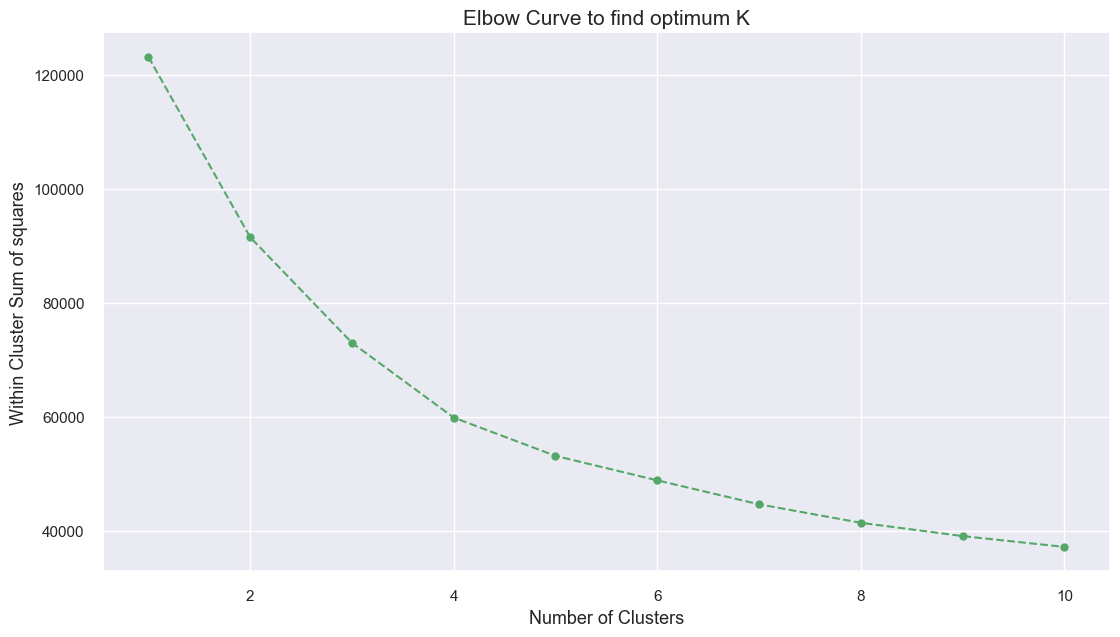

In [5]:
sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize':(13,7)})

plt.plot(number_of_clusters, sum_of_squared_distance, 'go--')
plt.xlabel('Number of Clusters', fontsize=13)
plt.ylabel('Within Cluster Sum of squares', fontsize=13)
plt.title('Elbow Curve to find optimum K', fontsize=15)
plt.grid(True)
plt.show()

### Silhouette analysis

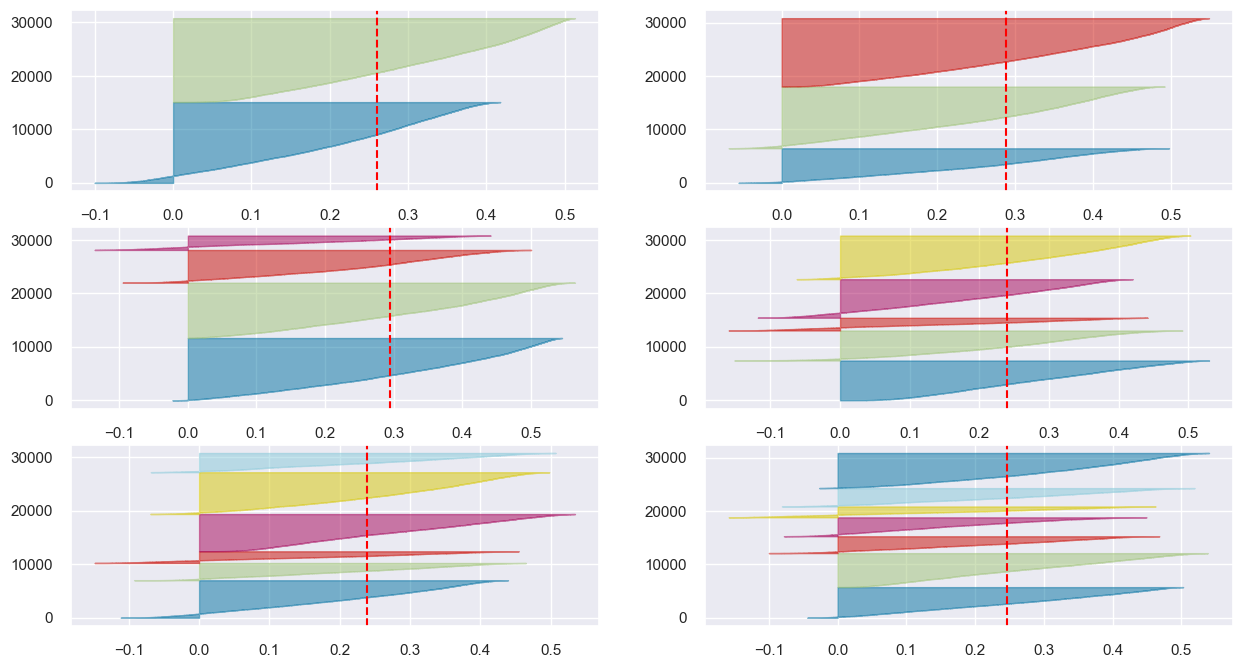

In [6]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in list(range(2, 8)):
    # Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, n_init=10, random_state=42)
    q, mod = divmod(i, 2)
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_scaled)

### Davies-Bouldin index

In [7]:
number_of_clusters = list(range(2,11))
results  = {}

for i in number_of_clusters:
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    db_index = davies_bouldin_score(df_scaled, labels)
    results.update({i: db_index})

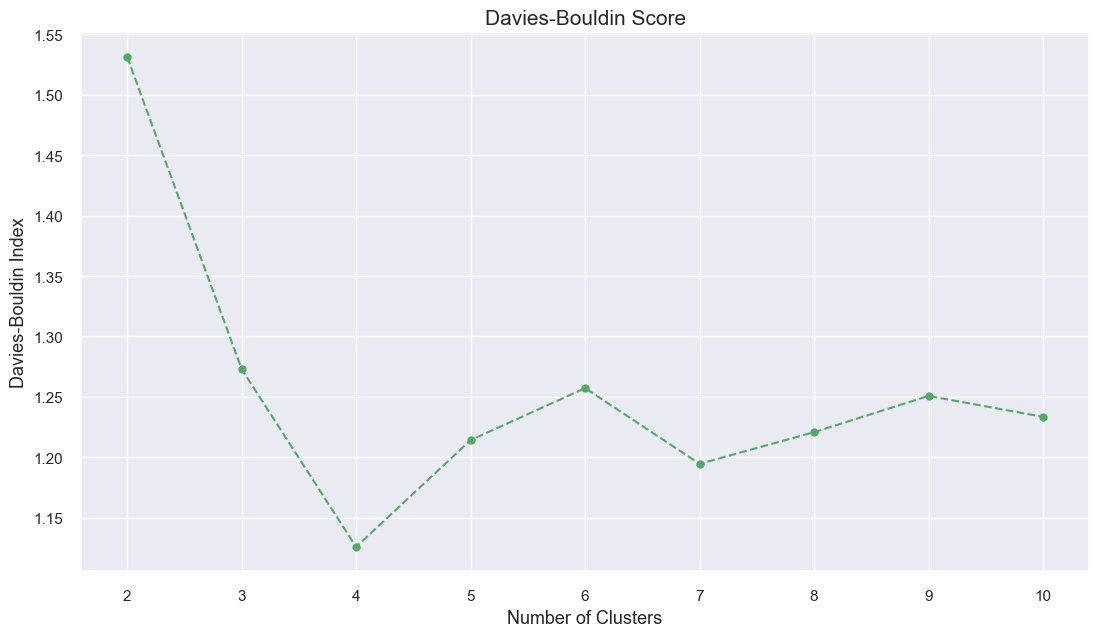

In [8]:
sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize':(13,7)})

plt.plot(list(results.keys()), list(results.values()), 'go--')
plt.xlabel('Number of Clusters', fontsize=13)
plt.ylabel('Davies-Bouldin Index', fontsize=13)
plt.title('Davies-Bouldin Score', fontsize=15)
plt.grid(True)
plt.show()

### Choose the number of clusters

In [9]:
# Create a KMeans object having 4 clusters and being named kmeans
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42).fit_predict(df_scaled)
# The below command has been used for visualization purpose only. We want to have a look at the created clusters and
# the frequency from each cluster
unique, counts = np.unique(kmeans, return_counts=True)
# If we have 2 iterables (e.g. lists or tuples) of equal length and need to create a dictionary, we have
# to use the zip() function
print(f"Created clusters - {dict(zip(unique, counts))}")

# Create a dataframe for kmeans object
clusters = pd.DataFrame({'Clusters' : kmeans})
df_clusters = pd.concat([df.reset_index(), clusters], axis=1)

Created clusters - {0: 11649, 1: 10340, 2: 6109, 3: 2683}


In [13]:
# Check the average value for each column of the clusters
df_clusters.groupby(['Clusters']).median(numeric_only=True)

,GRAV. 10 - PM 10_Valoare [µg/m³],MTX - Presiunea aerului_Valoare [mbar],MTX - Temperatura aer_Valoare [°C],MTX - Umiditate relativa_Valoare [%]
Clusters,,,,
0,24.9375,1002.533333,21.630000,62.75
1,20.5300,1004.700000,6.545833,86.75
2,20.1700,945.150000,11.536000,77.50
3,52.8775,1002.400000,3.652500,81.00
